In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from kuramoto import Kuramoto, plot_activity, plot_phase_coherence

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

### Instantiate a random graph and transform into an adjacency matrix

In [6]:
graph_nx = nx.erdos_renyi_graph(n=100, p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)

### Instantiate model with parameters

In [7]:
model = Kuramoto(coupling=3, dt=0.01, T=10, n_nodes=len(graph))                 

### Run simulation - output is time series for all nodes (node vs time)

In [8]:
act_mat = model.run(adj_mat=graph)
print(act_mat.shape)

(100, 1000)


### Plot all the time series

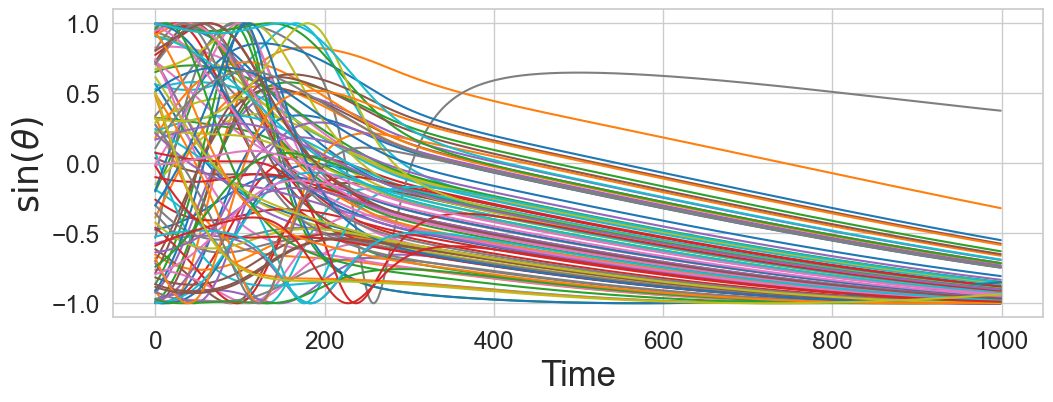

In [9]:
plot_activity(act_mat);

### Plot evolution of order global order parameter $R_t$

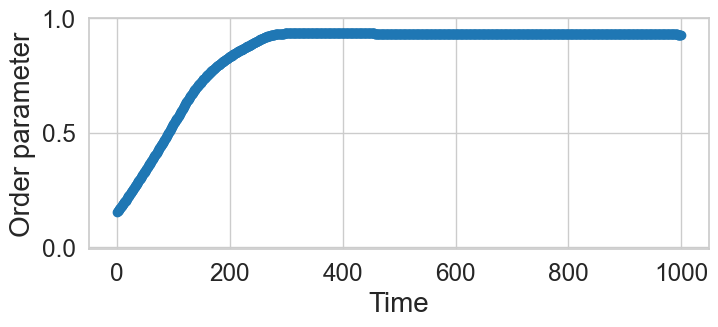

In [10]:
plot_phase_coherence(act_mat);

### Plot oscillators in complex plane at different times

Text(0.5, 1.0, 'Time = 0')

Text(0.5, 1.0, 'Time = 200')

Text(0.5, 1.0, 'Time = 999')

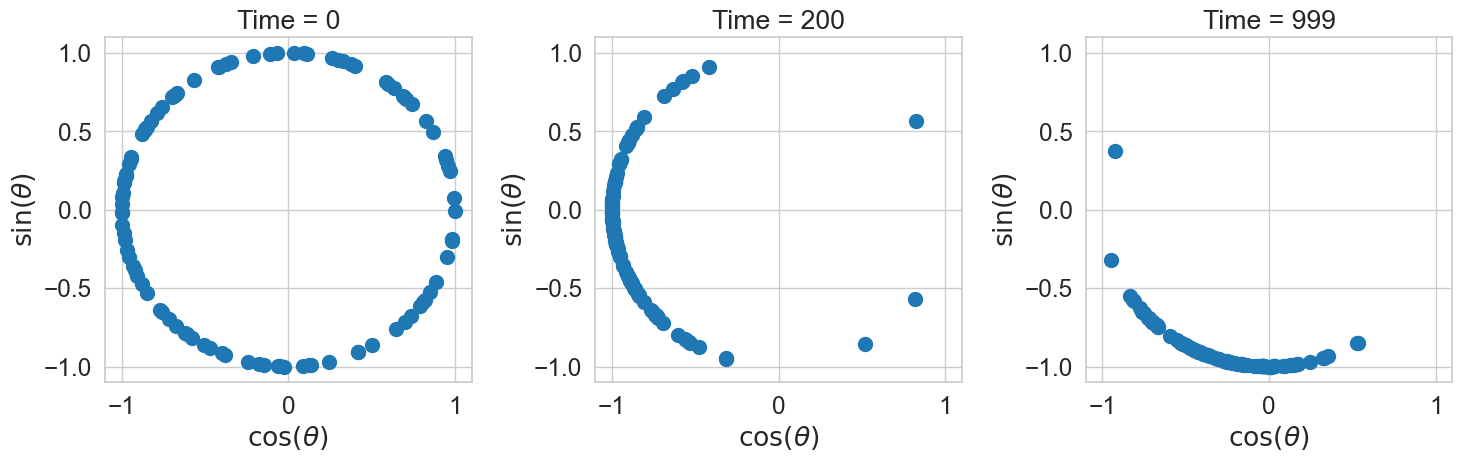

In [11]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',                             
                         })

times = [0, 200, 999]
for ax, time in zip(axes, times):
    ax.plot(np.cos(act_mat[:, time]), 
            np.sin(act_mat[:, time]), 
            'o', 
            markersize=10)
    ax.set_title(f'Time = {time}')
plt.tight_layout();